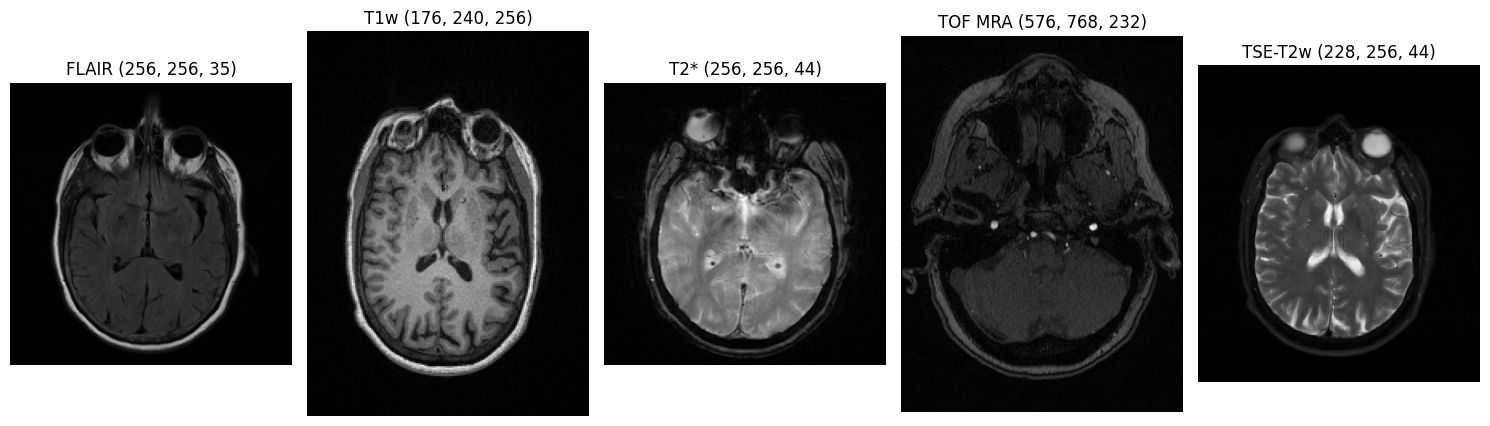

In [2]:
from oasis_util import visualize_structural_mri_session

visualize_structural_mri_session("../data/oasis-3-proc-1/OAS30001_MR_d2430/")

In [3]:
import os
import numpy as np
np.set_printoptions(precision=4, suppress=True)
import matplotlib.pyplot as plt
plt.rcParams['image.cmap'] = 'gray'
plt.rcParams['image.interpolation'] = 'nearest'
import nibabel as nib

In [21]:
from dipy.viz import regtools
from dipy.align.imaffine import (AffineMap,
                                  MutualInformationMetric,
                                  AffineRegistration)
from dipy.align.transforms import (TranslationTransform3D,
                                    RigidTransform3D,
                                    AffineTransform3D)

flair_img = nib.load("../data/oasis-3-proc-1/OAS30001_MR_d2430/sub-OAS30001_ses-d2430_FLAIR_LPS.nii.gz")
mra_img = nib.load("../data/oasis-3-proc-1/OAS30001_MR_d2430/sub-OAS30001_ses-d2430_acq-TOF_angio_LPS.nii.gz")
t2_img = nib.load("../data/oasis-3-proc-1/OAS30001_MR_d2430/sub-OAS30001_ses-d2430_acq-TSE_T2w_LPS.nii.gz")

t1_ref = nib.load("../data/oasis-3-proc-1/OAS30001_MR_d2430/sub-OAS30001_ses-d2430_T1w_LPS.nii.gz")


flair_data = flair_img.get_fdata()
flair_affine = flair_img.affine
mra_data = mra_img.get_fdata()
mra_affine = mra_img.affine
t2_data = t2_img.get_fdata()
t2_affine = t2_img.affine

t1_ref_data = t1_ref.get_fdata()
t1_ref_affine = t1_ref.affine

identity = np.eye(4)
flair_affine_map = AffineMap(identity,
                        t1_ref_data.shape, t1_ref_affine,
                        flair_data.shape, flair_affine)
flair_resampled = flair_affine_map.transform(flair_data)

mra_affine_map = AffineMap(identity,
                        t1_ref_data.shape, t1_ref_affine,
                        mra_data.shape, mra_affine)
mra_resampled = mra_affine_map.transform(mra_data)

t2_affine_map = AffineMap(identity,
                        t1_ref_data.shape, t1_ref_affine,
                        t2_data.shape, t2_affine)
t2_resampled = t2_affine_map.transform(t2_data)

[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]


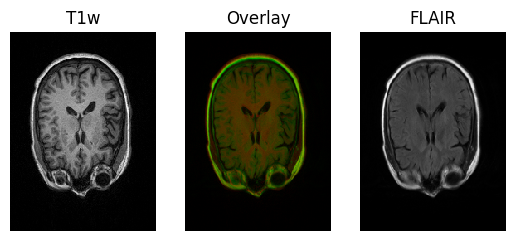

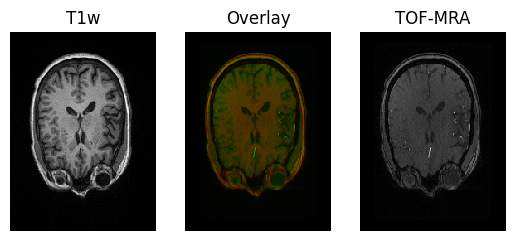

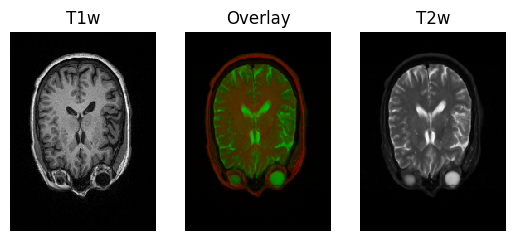

In [22]:
regtools.overlay_slices(t1_ref_data, flair_resampled, None, 2,
                         "T1w", "FLAIR")

regtools.overlay_slices(t1_ref_data, mra_resampled, None, 2,
                         "T1w", "TOF-MRA")

regtools.overlay_slices(t1_ref_data, t2_resampled, None, 2,
                         "T1w", "T2w")

# almost perfectly registered using only metadata :)

x = 0